In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline  

import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data from the 2014 boston marathon
marathon = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')
marathon.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [86]:
marathon.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [3]:
marathon_df = marathon[['name', 'division', 'gender', 'age', 'official', 'bib',
            'genderdiv', 'ctz', 'state', 'country', 'city', 'pace', '5k',
            '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'overall']]

In [4]:
cols_to_num = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for col in cols_to_num:
    ind = marathon_df[marathon_df[col] == '-'].index
    marathon_df.loc[ind, col] = np.nan
    marathon_df[col] = pd.to_numeric(marathon_df[col])

In [5]:
marathon_df.dtypes

name          object
division       int64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
state         object
country       object
city          object
pace         float64
5k           float64
10k          float64
20k          float64
25k          float64
30k          float64
35k          float64
40k          float64
half         float64
overall        int64
dtype: object

In [6]:
marathon_df.isnull().sum()

name             0
division         0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
state         2576
country          0
city             1
pace             0
5k              52
10k             50
20k             51
25k            216
30k             40
35k             34
40k             39
half            72
overall          0
dtype: int64

In [7]:
cols_to_num = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
na_index = []
for col in cols_to_num:
    ind = marathon_df[marathon_df[col].isnull()].index
    na_index.extend(ind)
na_index = list(pd.Series(na_index).unique())
marathon_df = marathon_df.drop(index = na_index)

In [8]:
marathon_df.shape

(31649, 21)

In [9]:
marathon_df.head()

,name,division,gender,age,official,bib,genderdiv,ctz,state,country,...,pace,5k,10k,20k,25k,30k,35k,40k,half,overall
0,"Yamamoto, Hiroyuki",8,M,47,85.25,W1,8,NaN,NaN,JPN,...,3.27,8.02,17.37,37.65,47.67,59.18,71.40,80.43,39.72,8
1,"Jeptoo, Rita",1,F,33,138.95,F1,1,NaN,NaN,KEN,...,5.30,16.22,32.58,65.83,82.43,99.33,116.37,132.10,69.47,21
2,"Van Dyk, Ernst F.",1,M,41,80.60,W2,1,NaN,NaN,RSA,...,3.08,7.75,16.62,36.10,45.80,56.45,67.42,76.10,38.03,1
3,"Dibaba, Mare",3,F,24,140.58,F2,3,NaN,NaN,ETH,...,5.37,16.20,32.57,65.83,82.43,99.33,116.37,132.95,69.47,27
4,"Hokinoue, Kota",2,M,40,81.23,W3,2,NaN,NaN,JPN,...,3.10,8.02,17.12,36.58,46.37,57.03,67.83,76.72,38.60,2


In [10]:
marathon_ppdf = marathon_df[['division', 'gender', 'age', 'official',
            'genderdiv', 'pace', '5k',
            '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'overall']]

marathon_ppdf['gender'] = marathon_ppdf['gender'].replace({'M':1, 'F':0})
marathon_ppdf['country_usa'] = np.where(marathon_df['country'] == 'USA', 1, 0)

marathon_ppdf.dtypes

division         int64
gender           int64
age              int64
official       float64
genderdiv        int64
pace           float64
5k             float64
10k            float64
20k            float64
25k            float64
30k            float64
35k            float64
40k            float64
half           float64
overall          int64
country_usa      int64
dtype: object

### Mean Shift

In [11]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import normalize

X = normalize(marathon_ppdf)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
%timeit ms.fit(X)

# Extract cluster assignments for each data point.
ms_labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(ms_labels))

print("Number of estimated clusters: {}".format(n_clusters_))

819 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Number of estimated clusters: 4


In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

metrics.silhouette_score(X, ms_labels, metric='euclidean')

0.5201613856720274

[0.55724074 0.27768648]


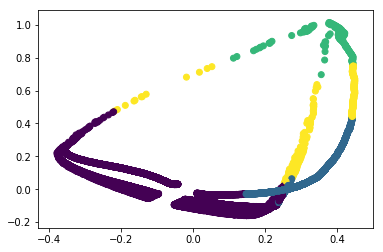

In [13]:
from sklearn.decomposition import PCA
X = normalize(marathon_ppdf)

pca = PCA(2)
pcs = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

plt.figure()
plt.scatter(pcs[:,0],pcs[:,1], c=ms_labels)

### Spectral Clustering

In [33]:
from sklearn.cluster import SpectralClustering
from sklearn.utils import resample

#This is commented out so it doesn't get reset.
#X = resample(marathon_ppdf, replace = False, n_samples = 1000)

#pca = PCA(2)
#pcs = pca.fit_transform(X)

In [38]:
# Declare and fit the model.
spec = SpectralClustering(n_clusters = 4, n_neighbors=10, assign_labels='discretize', gamma = 30)

#Predicted clusters.
predict = spec.fit_predict(pcs)

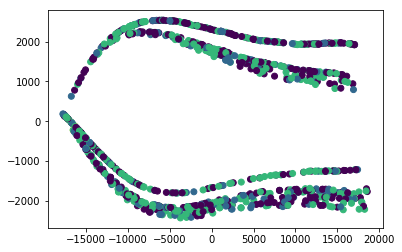

In [39]:
plt.figure()
plt.scatter(pcs[:,0], pcs[:,1], c=predict)

In [40]:
metrics.silhouette_score(pcs, predict, metric='euclidean')

-0.2004512141181031

The spectral clustering method clearly didn't cluster very well. The silhouette coefficient is negative, meaning the clusters are not defined clearly. However, below these clusters will explore anyways.

In [ ]:
#Storing the resampling set used for spectral clustering so that it doesn't have to be run again to search for
#the medusa like graph.
#This is before PCA, so if it needs to be run again

### Affinity Propogation

In [239]:
from sklearn.cluster import AffinityPropagation

X = resample(marathon_ppdf, replace = False, n_samples = 1000)

pca = PCA(2)
pcs = pca.fit_transform(X)

af = AffinityPropagation().fit(pcs)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 264


### Correlation Matrix

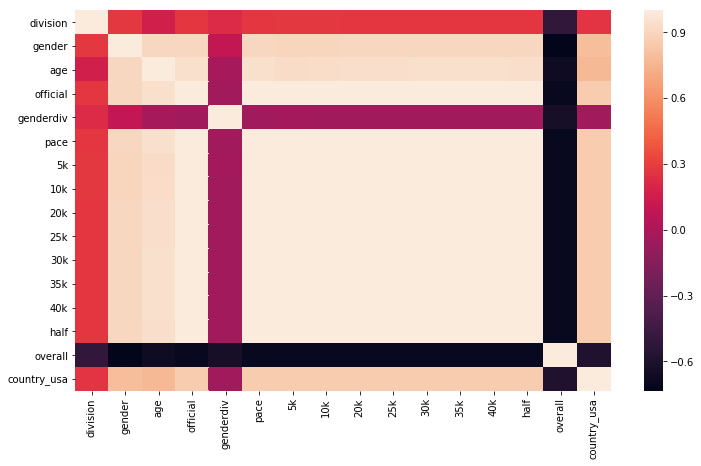

In [267]:
corrmat = pd.DataFrame(normalize(marathon_ppdf), columns = marathon_ppdf.columns).corr()
plt.figure(figsize = (12, 7))
sns.heatmap(corrmat)

Notes:

Gender division doesn't correlate very well with other variables because it's more of a categorical variable despite it's enumeration.

Age correlates positively with all race times.

Being male correlates positively with race times.

Also, having US nationality correlates positively (r = 0.8) with race times, but this is more likely due to the fact that around 90% of the population set are US Nationals.

Thus age and gender are the most interesting correlations in this dataset.

### Exploring and Comparing Mean Shift Clusters

In [271]:
X = marathon_ppdf
X['cluster'] = ms_labels
X0 = X[X['cluster'] == 0]
X1 = X[X['cluster'] == 1]
X2 = X[X['cluster'] == 2]
X3 = X[X['cluster'] == 3]

In [277]:
X.groupby('cluster').count()['overall']

cluster
0    27727
1     3446
2      181
3      295
Name: overall, dtype: int64

All of the clusters are small (X1, X2, X3) compared to the largest cluster (X0) in the group.

In [291]:
#comparing mean values for each feature by cluster.
X.groupby('cluster').mean().T

cluster,0,1,2,3
division,1959.226566,1882.607371,33.154696,122.332203
gender,0.490785,1.000000,0.812155,0.959322
age,43.796732,32.219385,31.314917,35.244068
official,250.532719,185.711567,133.917569,158.742746
genderdiv,8725.986583,3265.289031,37.624309,271.362712
pace,9.563714,7.091506,5.115580,6.062610
5k,26.437171,20.785789,14.667901,18.254644
10k,53.195039,41.468578,29.828011,36.505153
20k,108.686300,83.306053,61.112707,73.349119
25k,137.998372,104.598003,76.782431,91.821729


In [311]:
#Comparing finishing times side by side
X.groupby('cluster').describe()['official'].T

cluster,0,1,2,3
count,27727.000000,3446.000000,181.000000,295.000000
mean,250.532719,185.711567,133.917569,158.742746
std,48.003992,14.467325,23.141131,3.689689
min,165.700000,160.020000,80.600000,152.130000
25%,214.670000,174.850000,128.800000,155.710000
50%,238.900000,183.240000,143.530000,158.520000
75%,279.750000,195.672500,149.430000,161.140000
max,538.880000,218.370000,191.330000,166.720000


(0, 400)

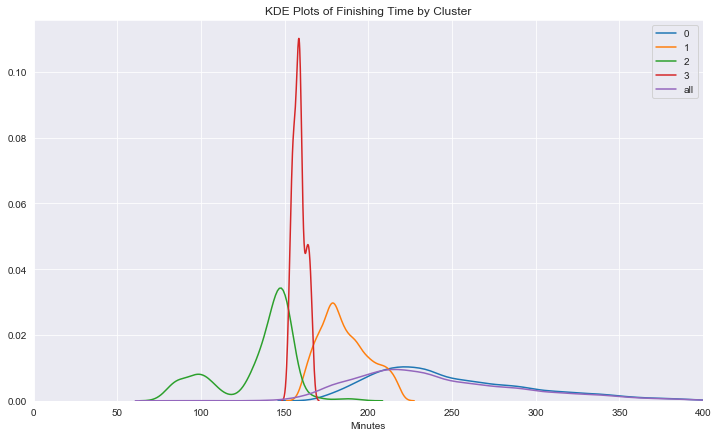

In [313]:
plt.figure(figsize = (12,7))
sns.set_style("darkgrid")

sns.kdeplot(X0['official'], label = 0)
sns.kdeplot(X1['official'], label = 1)
sns.kdeplot(X2['official'], label = 2)
sns.kdeplot(X3['official'], label = 3)
sns.kdeplot(marathon_ppdf['official'], label = 'all')

plt.title('KDE Plots of Finishing Time by Cluster')
plt.xlabel('Minutes')
plt.xlim(0,400)

In [316]:
#Comparing age distributions by cluster.
X.groupby('cluster').describe()['age'].T

cluster,0,1,2,3
count,27727.000000,3446.000000,181.000000,295.000000
mean,43.796732,32.219385,31.314917,35.244068
std,11.179402,5.281788,7.065979,8.676426
min,18.000000,18.000000,18.000000,21.000000
25%,36.000000,28.000000,27.000000,27.000000
50%,45.000000,33.000000,30.000000,33.000000
75%,51.000000,36.000000,34.000000,42.000000
max,81.000000,44.000000,59.000000,58.000000


Text(0.5, 0, 'Years')

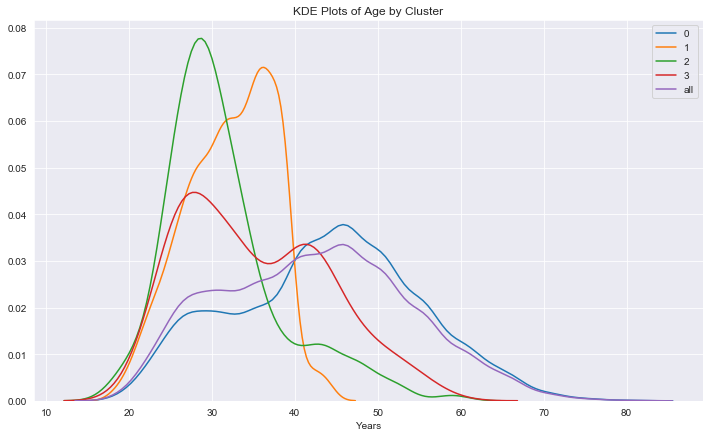

In [315]:
plt.figure(figsize = (12,7))
sns.set_style("darkgrid")

sns.kdeplot(X0['age'], label = 0)
sns.kdeplot(X1['age'], label = 1)
sns.kdeplot(X2['age'], label = 2)
sns.kdeplot(X3['age'], label = 3)
sns.kdeplot(X['age'], label = 'all')

plt.title('KDE Plots of Age by Cluster')
plt.xlabel('Years')

This KDE Chart demonstrates the importance of age for running times. Looking at the KDE's for each cluster, the modes correspond to the order of average finishing times time. For example, cluster two demonstrated the fasted overall finishing times and the mode for cluster tow is the loweest. Cluster 3 was second fastest, cluster 1 the third fastest, and cluster 4 the slowest.

In [317]:
X.groupby('cluster').describe()['gender'].T

cluster,0,1,2,3
count,27727.000000,3446.0,181.000000,295.000000
mean,0.490785,1.0,0.812155,0.959322
std,0.499924,0.0,0.391672,0.197879
min,0.000000,1.0,0.000000,0.000000
25%,0.000000,1.0,1.000000,1.000000
50%,0.000000,1.0,1.000000,1.000000
75%,1.000000,1.0,1.000000,1.000000
max,1.000000,1.0,1.000000,1.000000


Without having to make a visual, it's clear that the fastest times were dominated by men. Clusters 1 and 3, are virtually all men, and cluster 2 is 81.2% men; these three clusters were all the fastest clusters. Cluster 4, the cluster with 'everyone else', has split 50/50 gender ratio. The majority of top tier runners are men.

### Exploring the Spectral Clustering Clusters

In [43]:
Xspec = X #Terrible Code, X variable happens to carry two different datasets but it happens to have the spectral clustering sample now.

In [44]:
#adding the cluster labels
Xspec['cluster'] = predict

In [45]:
Xspec.groupby('cluster').count()['overall']

cluster
0    405
1    178
2    413
3      4
Name: overall, dtype: int64

In [46]:
Xspec.groupby('cluster').mean().T

cluster,0,1,2,3
division,2022.950617,1830.702247,1951.714286,431.5000
gender,0.530864,0.561798,0.554479,1.0000
age,41.575309,43.123596,42.295400,36.5000
official,244.608840,240.739719,240.519177,170.9950
genderdiv,8070.846914,8137.382022,7901.852300,986.7500
pace,9.338049,9.189944,9.181937,6.5350
5k,25.755259,25.734326,25.599685,19.5925
10k,51.791160,51.657640,51.443487,38.9850
20k,105.877704,105.351685,104.773850,78.3125
25k,134.734272,133.397584,132.835642,98.2575


All of the means across every category within the clusters are pretty much the same, with the exclusion of cluster three which only has four runners in the cluster (that ran faster than the other clusters). This is definitely not a useful model.

-----------------

Overall, the best solution to our clustering problem was 4 clusters on the mean shift clustering method. The spectral clustering method did not output clusters that actually clustered together, and the affinity propogation method (as it always does) returned 274 different clusters which is far too many.

4 clusters was the sweet spot based on bandwidth used with the estimating bandwidth. Some other methods to check whether this was the best is to see whether the silhouhette score is the same across subsets of the data.

From the mean shift clustering method we saw that the four groups that were clustered together represented running speed groups. There were top tier runner, second tier runner, third tier runners, and a cluster that contained the rest of the group. While there was certainly overlap between the clusters based on the KDE plots, it is definitley clear visually that the clusters seemed were ranked based on very distinct modes for each KDE.

The groups showed that the fastest groups were comprised mostly of men, and that younger runners ran faster than older runners. While clusters 1 and 3 were also comprised of virtually all men, their KDE's overlap with cluster 0, indicating that the given speeds for clusters 1 and 3 don't isn't just due the fact they're men. Cluster two however, only overlaps slightly with KDE's of the other clusters. This is stronger indicator (although not airtight) that men run faster than the women in the boston marathon.